In [1]:
# importing the general dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings
from PIL import Image
from scipy import misc

In [ ]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d fatihkgg/affectnet-yolo-format
!unzip affectnet-yolo-format.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
def random_color_shift(image):
    # Define a set of random colors
    random_colors = ['none', 'blue', 'red', 'green', 'yellow', 'cyan', 'magenta']
    # Select a random color from the set
    selected_color = np.random.choice(random_colors)
    # Define intensity range for the color shift
    min_intensity, max_intensity = 0.4, 1.2
    intensity = np.random.uniform(min_intensity, max_intensity)
    # Apply the random color shift
    image = change_light_color(image, color=selected_color, intensity=intensity)
    return image
def change_light_color(image, color='none', intensity=1.0):
    # Convert image to float32
    image = image.astype(np.float32)
    # Define color channels for different light colors
    if color == 'none':
        pass
    elif color == 'blue':
        # Increase blue channel
        image[:, :, 2] += 255 * intensity
    elif color == 'red':
        # Increase red channel
        image[:, :, 0] += 255 * intensity
    elif color == 'green':
        # Increase green channel
        image[:, :, 1] += 255 * intensity
    elif color == 'yellow':
        # Increase red and green channels
        image[:, :, 0:2] += 255 * intensity
    elif color == 'cyan':
        # Increase green and blue channels
        image[:, :, 1:] += 255 * intensity
    elif color == 'magenta':
        # Increase red and blue channels
        image[:, :, 0:3:2] += 255 * intensity
    else:
        raise ValueError("Unsupported color. Choose from 'blue', 'red', 'green', 'yellow', 'cyan', 'magenta'.")
    # Clip pixel values to [0, 255]
    image = np.clip(image, 0, 255)
    # Convert back to uint8
    image = image.astype(np.uint8)
    return image

In [4]:
import random

def rotate_and_color_shift_images(input_dir):
    # Function to rotate images randomly, apply color shift, and replace the original image
    def rotate_and_color_shift_image(image_path):
        img = Image.open(image_path)
        original_size = img.size  # Get original image size
        # Apply random color shift first
        img_array = np.array(img)
        img_array = random_color_shift(img_array)
        img = Image.fromarray(img_array)
        # Rotate the image
        angle = random.randint(0, 360)
        rotated_img = img.rotate(angle, expand=False)
        # Save the rotated and color-shifted image, overwriting the original image
        rotated_img.save(image_path)

    # Loop through all image files in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            input_path = os.path.join(input_dir, filename)
            rotate_and_color_shift_image(input_path)

    print("Images have been rotated and color-shifted, and replaced in", input_dir)


In [5]:
train_dir = 'YOLO_format/train/images'
val_dir= 'YOLO_format/valid/images'
test_dir = 'YOLO_format/test/images'


rotate_and_color_shift_images(train_dir)
rotate_and_color_shift_images(val_dir)
rotate_and_color_shift_images(test_dir)

Images have been rotated and color-shifted, and replaced in YOLO_format/train/images
Images have been rotated and color-shifted, and replaced in YOLO_format/valid/images
Images have been rotated and color-shifted, and replaced in YOLO_format/test/images


['image0022879.jpg', 'ffhq_1016.png', 'image0026679.jpg', 'ffhq_2915.png', 'ffhq_4383.png', 'image0039176.jpg', 'image0013975.jpg', 'image0034106.jpg', 'image0041454.jpg', 'image0038039.jpg', 'ffhq_1482.png', 'ffhq_1967.png', 'image0042281.jpg', 'ffhq_3882.png', 'image0020561.jpg', 'image0042356.jpg', 'image0028186.jpg', 'image0032768.jpg', 'image0023439.jpg', 'image0032021.jpg', 'image0027116.jpg', 'ffhq_3893.png', 'image0033101.jpg', 'image0037820.jpg', 'image0036232.jpg', 'image0029948.jpg', 'image0031230.jpg', 'image0027077.jpg', 'image0026647.jpg', 'image0025591.jpg', 'ffhq_5066.png', 'image0028705.jpg', 'image0028341.jpg', 'image0037784.jpg', 'image0028207.jpg', 'image0020007.jpg', 'image0040858.jpg', 'image0027189.jpg', 'image0009395.jpg', 'image0019231.jpg', 'image0038142.jpg', 'image0031499.jpg', 'image0017844.jpg', 'image0030589.jpg', 'ffhq_4080.png', 'image0037674.jpg', 'ffhq_5401.png', 'ffhq_2908.png', 'image0013783.jpg', 'ffhq_3561.png', 'image0039254.jpg', 'ffhq_1595.png'

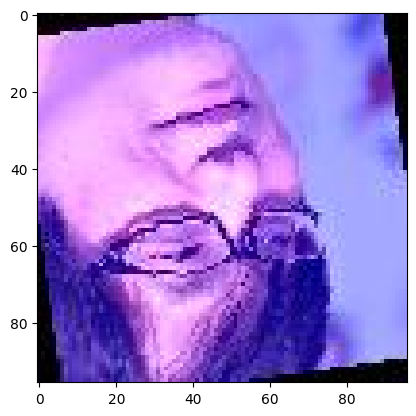

In [8]:
images = os.listdir(train_dir)
image = Image.open('YOLO_format/train/images/'+ images[12])
plt.imshow(image)
print(images)

In [9]:
import yaml
# Define your data
data = {
    'data': 'YOLO_format',
    'train': 'YOLO_format/train/images',
    'val': 'YOLO_format/valid/images',
    'test': 'YOLO_format/test/images',
    'nc': 8,
    'names': [
        "Anger",
        "Contempt",
        "Disgust",
        "Fear",
        "Happy",
        "Neutral",
        "Sad",
        "Surprise",
    ],
    'network': 'yolov8n'
}

# Specify the file path
file_path = '/content/yolo_config.yaml'

# Write the data to a YAML file
with open(file_path, 'w') as file:
    yaml.dump(data, file)

In [ ]:
# Lets check what we have in our dataset
dataset_root = 'YOLO_format/'
for root, directories, files in os.walk(dataset_root):
    # Do something with the current directory path 'root'
    print("Current directory:", root)
    # Do something with the list of subdirectories 'directories'
    print("Subdirectories:", directories)
    # Do something with the list of files 'files'
    print("Files:", len(files))

In [ ]:
!pip install ultralytics

In [11]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [12]:
model = YOLO('yolov8n.pt')
os.environ["WANDB_MODE"] = "disabled"

100%|██████████| 6.23M/6.23M [00:00<00:00, 25.1MB/s]


In [14]:
yaml_path = '/content/yolo_config.yaml'
model.train(
    data=yaml_path,
    epochs=12,
    batch=8,
    name='rotat_illuminated_model',
    imgsz=640)

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo_config.yaml, epochs=12, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=rotat_illuminated_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 4.82MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/YOLO_format/train/labels... 17101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17101/17101 [00:12<00:00, 1327.85it/s]


train: New cache created: /content/YOLO_format/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/YOLO_format/valid/labels... 5406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5406/5406 [00:04<00:00, 1253.80it/s]


val: New cache created: /content/YOLO_format/valid/labels.cache
Plotting labels to runs/detect/rotat_illuminated_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/rotat_illuminated_model2
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12      1.42G     0.1511      2.012     0.9467         15        640: 100%|██████████| 2138/2138 [06:25<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:42<00:00,  7.87it/s]

                   all       5406       5406      0.181      0.807      0.228      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12      1.25G    0.09544      1.597     0.9015         20        640: 100%|██████████| 2138/2138 [05:54<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:41<00:00,  8.22it/s]

                   all       5406       5406      0.179      0.738      0.218      0.218


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      1.38G    0.06022      1.518     0.9135          5        640: 100%|██████████| 2138/2138 [05:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:40<00:00,  8.37it/s]

                   all       5406       5406      0.214      0.663      0.241       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      1.25G    0.04874      1.469     0.9082          5        640: 100%|██████████| 2138/2138 [05:24<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:39<00:00,  8.45it/s]

                   all       5406       5406      0.209      0.685      0.256      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12      1.25G    0.04172      1.442     0.9053          5        640: 100%|██████████| 2138/2138 [05:25<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:40<00:00,  8.45it/s]

                   all       5406       5406      0.217      0.675      0.271      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12      1.25G    0.03772      1.417      0.901          5        640: 100%|██████████| 2138/2138 [05:25<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:40<00:00,  8.44it/s]

                   all       5406       5406      0.232      0.684      0.284      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12      1.25G    0.03449      1.401     0.9028          5        640: 100%|██████████| 2138/2138 [05:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:41<00:00,  8.22it/s]

                   all       5406       5406      0.228      0.679      0.287      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12      1.25G      0.031      1.386     0.9006          5        640: 100%|██████████| 2138/2138 [05:23<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:40<00:00,  8.43it/s]

                   all       5406       5406      0.242      0.676      0.305      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12      1.25G        inf      1.365     0.9001          5        640: 100%|██████████| 2138/2138 [05:26<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:40<00:00,  8.45it/s]

                   all       5406       5406      0.251      0.688      0.324      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12      1.25G    0.02555      1.351     0.9014          5        640: 100%|██████████| 2138/2138 [05:24<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:39<00:00,  8.45it/s]

                   all       5406       5406      0.253      0.678       0.34       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12      1.24G    0.02286      1.327     0.8991          5        640: 100%|██████████| 2138/2138 [05:23<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:40<00:00,  8.26it/s]

                   all       5406       5406      0.279      0.628      0.357      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12      1.25G    0.02027      1.306     0.8981          5        640: 100%|██████████| 2138/2138 [05:23<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:40<00:00,  8.32it/s]


                   all       5406       5406      0.287       0.67      0.374      0.374

12 epochs completed in 1.247 hours.
Optimizer stripped from runs/detect/rotat_illuminated_model2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/rotat_illuminated_model2/weights/best.pt, 6.3MB

Validating runs/detect/rotat_illuminated_model2/weights/best.pt...
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:42<00:00,  7.96it/s]


                   all       5406       5406      0.287       0.67      0.374      0.374
                 Anger       5406        712      0.251      0.789       0.32       0.32
              Contempt       5406        618       0.27      0.401      0.279      0.279
               Disgust       5406        672      0.213      0.644      0.247      0.247
                  Fear       5406        622      0.285       0.81      0.446      0.446
                 Happy       5406        791       0.51      0.845      0.778      0.778
               Neutral       5406        514      0.271      0.494      0.285      0.285
                   Sad       5406        603      0.188      0.557      0.194      0.194
              Surprise       5406        874      0.309      0.821      0.442      0.442
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/rotat_illuminated_model2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab951d4c7c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [15]:
os.listdir('runs/detect/rotat_illuminated_model2')

['results.png',
 'F1_curve.png',
 'train_batch0.jpg',
 'args.yaml',
 'val_batch1_pred.jpg',
 'train_batch4276.jpg',
 'events.out.tfevents.1714545960.497ffacb2781.800.0',
 'results.csv',
 'labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch0_labels.jpg',
 'confusion_matrix.png',
 'val_batch2_pred.jpg',
 'confusion_matrix_normalized.png',
 'PR_curve.png',
 'train_batch1.jpg',
 'val_batch1_labels.jpg',
 'weights',
 'R_curve.png',
 'labels_correlogram.jpg',
 'train_batch4277.jpg',
 'P_curve.png',
 'train_batch4278.jpg',
 'val_batch2_labels.jpg',
 'train_batch2.jpg']

In [16]:
os.listdir('runs/detect/rotat_illuminated_model2/weights')

['best.pt', 'last.pt']

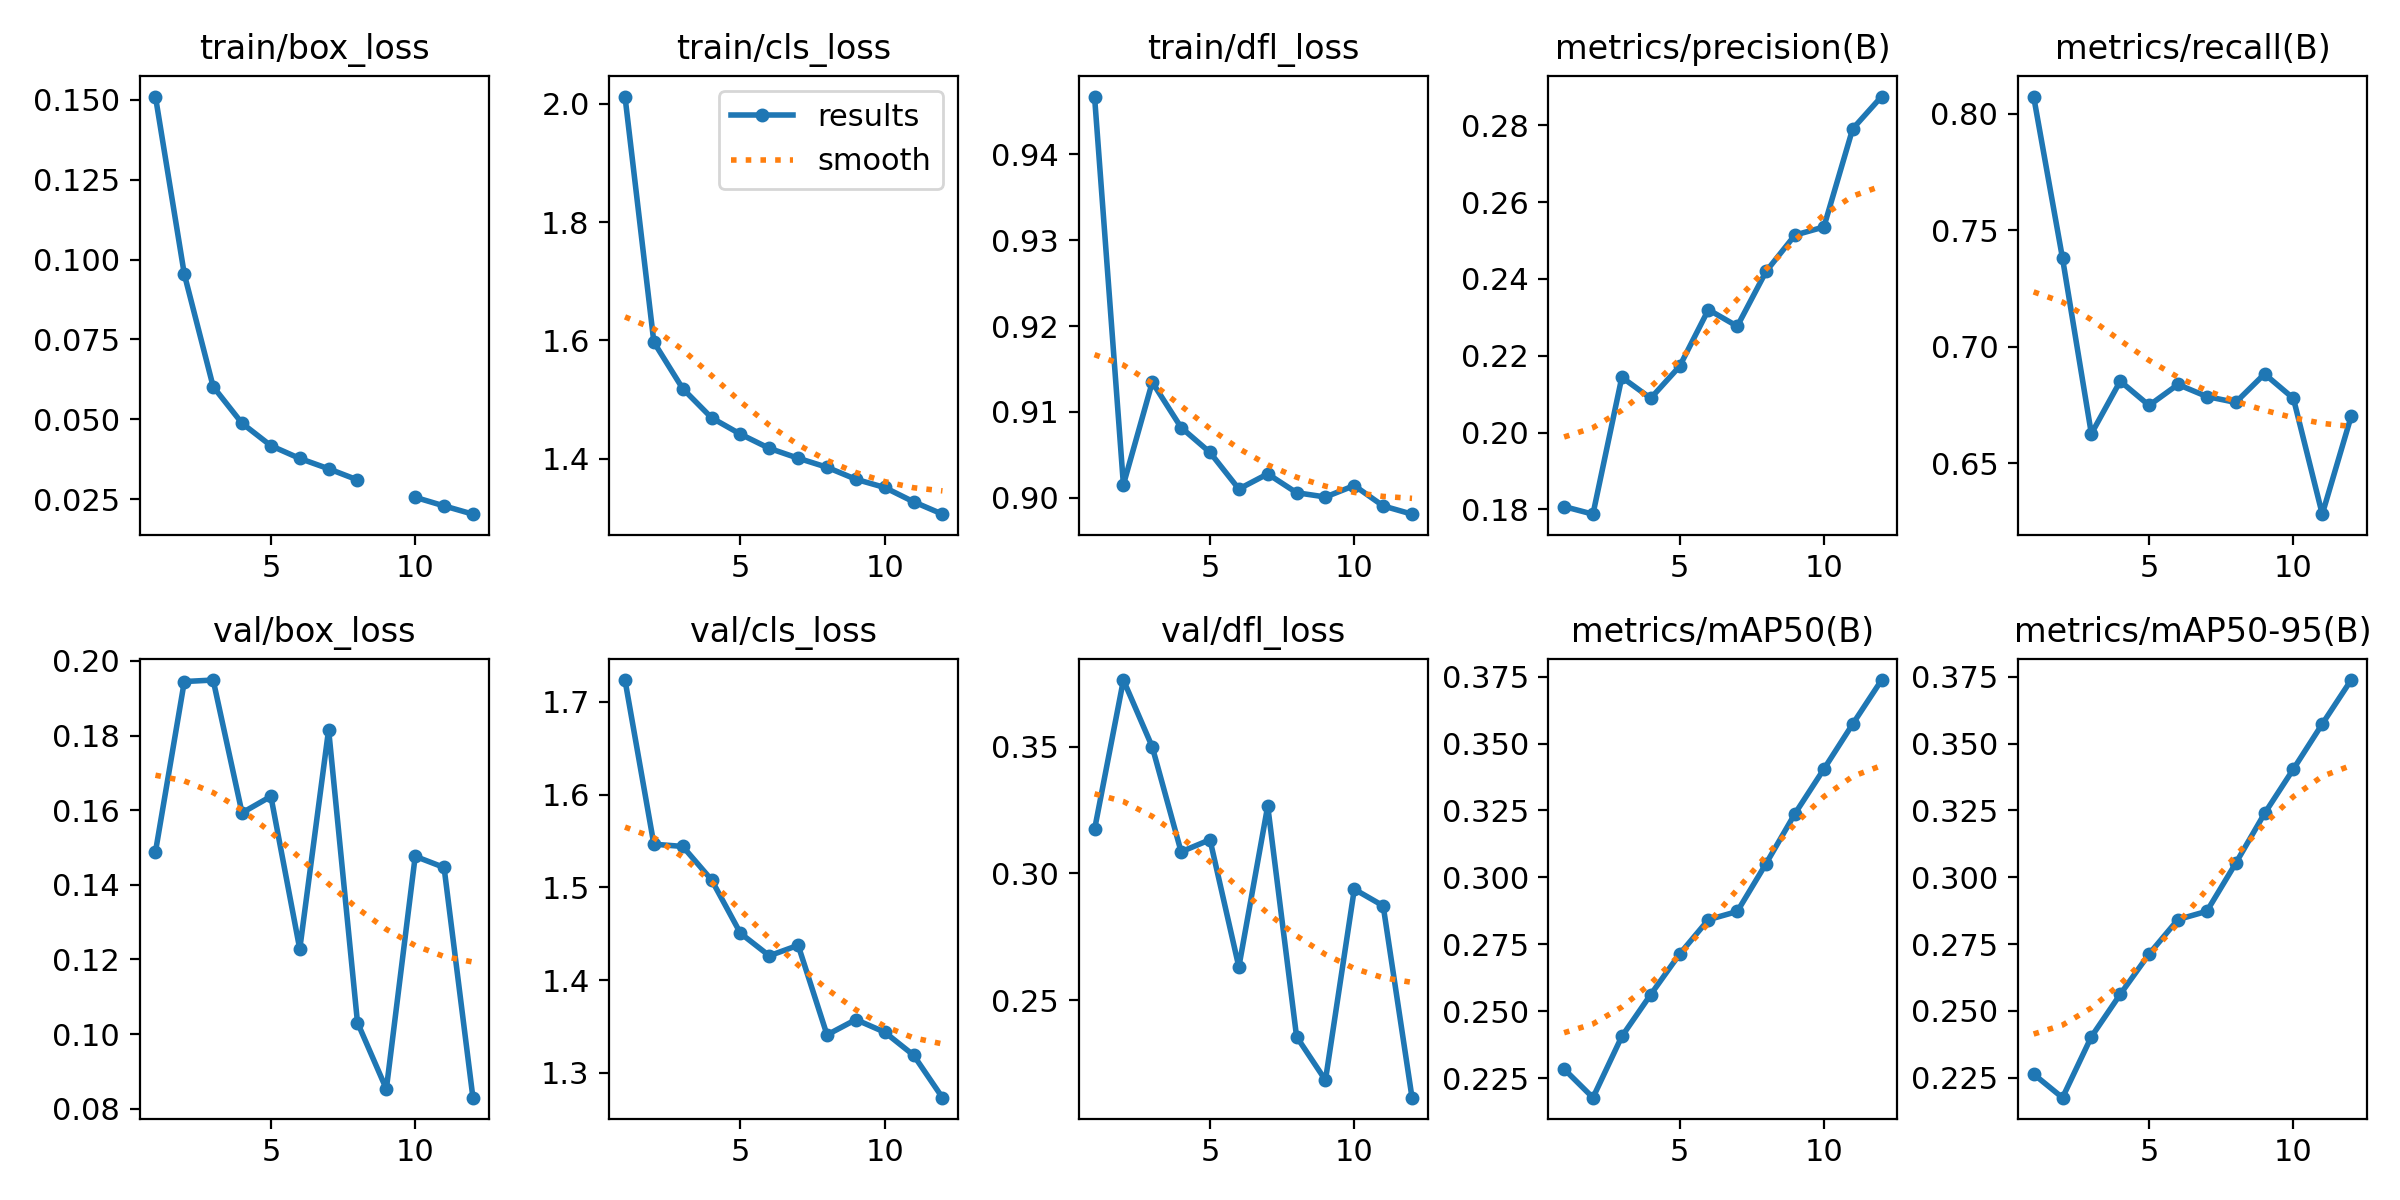

In [17]:
Image(filename=f"runs/detect/rotat_illuminated_model2/results.png", width=1000)

In [18]:
from google.colab import files
files.download('runs/detect/rotat_illuminated_model2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_model = YOLO('runs/detect/rotat_illuminated_model2/weights/best.pt')
test_model.predict(source='/content/YOLO_format/test/images')